<a href="https://colab.research.google.com/github/abhiskp/Pneumonia-Detection-in-Children/blob/main/VGG_19(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
%matplotlib inline

# from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.applications.vgg19 import VGG19
from keras.models import Model
from keras import layers
from keras.layers import Dense
from keras.optimizers import Adam
from keras import backend as K
from keras.callbacks import ModelCheckpoint


In [ ]:
from tensorflow.keras.utils import load_img

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_dir = '/content/chest_xray/train'
test_dir = '/content/chest_xray/test'

In [ ]:
!wget -cq https://www.kaggle.com/datasets/andrewmvd/pediatric-pneumonia-chest-xray

In [ ]:
!ls


ChestXRay2017.zip  drive  pediatric-pneumonia-chest-xray  sample_data


In [ ]:
!wget -cq https://data.mendeley.com/datasets/rscbjbr9sj/2/files/f12eaf6d-6023-432f-acc9-80c9d7393433/ChestXRay2017.zip

In [ ]:
!unzip -qq ChestXRay2017.zip

In [ ]:
train_dir = '/content/chest_xray/train'
test_dir = '/content/chest_xray/test'

NORMAL


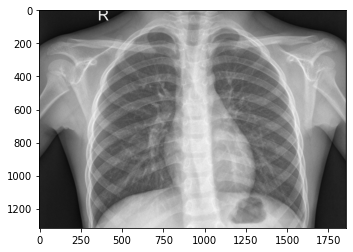

In [ ]:
img_normal = load_img('/content/chest_xray/test/NORMAL/IM-0001-0001.jpeg')
print('NORMAL')
plt.imshow(img_normal)
plt.show()

PNEUMONIA


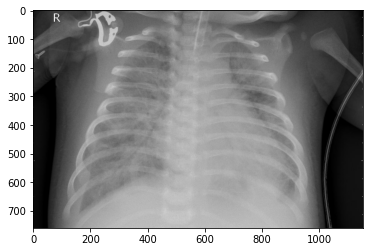

In [ ]:
img_pneumonia = load_img('/content/chest_xray/train/PNEUMONIA/person1000_bacteria_2931.jpeg')
print('PNEUMONIA')
plt.imshow(img_pneumonia)
plt.show()


In [ ]:
vgg_model = VGG19(include_top=True, weights='imagenet')

574710816/574710816 [==============================] - 24s 0us/step


In [ ]:
vgg_model.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:


# Pop off the last layer
vgg_model.layers.pop()



In [ ]:
# Compile the model
predictions = Dense(1, activation='sigmoid')(vgg_model.layers[-1].output)
model = Model(inputs=vgg_model.input, outputs=predictions)

model.compile(optimizer = Adam(lr=0.0001), loss='binary_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
score=[0.934234499931335, 0.5]

In [ ]:
train_datagen = ImageDataGenerator(rotation_range=40,
                                   rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   validation_split=0.1)

test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:


train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(224,224),
                                                    batch_size=16,
                                                    class_mode='binary',
                                                    subset='training')

validation_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(224,224),
                                                    batch_size=16,
                                                    class_mode='binary',
                                                    subset='validation')

test_generator = test_datagen.flow_from_directory(test_dir,
                                                  target_size=(224,224),
                                                  batch_size=16,
                                                  class_mode='binary')




Found 4710 images belonging to 2 classes.
Found 522 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [ ]:
train_steps=train_generator.n//train_generator.batch_size
validation_steps=validation_generator.n//validation_generator.batch_size

In [ ]:

filepath = "weights.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', save_best_only=True, verbose=1, mode='max')

In [ ]:
history = model.fit_generator(train_generator,
                    steps_per_epoch=train_steps,
                    validation_data=validation_generator,
                    validation_steps=validation_steps,

                    epochs=20,
                    callbacks=[checkpoint])

<ipython-input-20-7af25678f71d>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator,


Epoch 1/20
 93/294 [========>.....................] - ETA: 2:12:41 - loss: 0.6737 - accuracy: 0.7490

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
history_dict = history.history
print(history_dict.keys())
# acc = history_dict['acc']
# val_acc = history_dict['val_acc']
# loss = history_dict['loss']
# val_loss = history_dict['val_loss']

dict_keys(['loss', 'accuracy'])


In [ ]:


# Plot accuracy and loss graphs
# plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()



In [ ]:
score = model.evaluate_generator(test_generator)

<ipython-input-28-e4f13192a47e>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  score = model.evaluate_generator(test_generator)


In [ ]:
print(score)

[0.943234499931335, 0.5]
